In [1]:
from am4pa.linnea import DataManagerLinnea, LinneaConfig
from am4pa.linnea import OperandsSamplerCorner
from am4pa.linnea import MeasurementsMaganer
from va4algs import RankingDataLinnea
from va4algs import RankingModel
from va4algs import SmartMeasurementManager
import pandas as pd
pd.set_option('display.max_rows', None)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Step 1) Indicate the Expression and the Experiment ID


In [2]:
EXPRESSION_FILE = 'linnea-expressions/mc4.py'
EXPERIMENT_ID = 'MC4-ix01'

### Step 2) Sync with backend

In [3]:
SERVER = "login18-1.hpc.itc.rwth-aachen.de"
UNAME = "as641651"
BACK_END_FOLDER = "~/PhD/va4algs-exps/"
FRONT_END_FOLDER = "codes/"
bSLRUM = True

## Measurement parameters
NUM_OPERANDS = 5
MAX_OP_SIZE = 1500
CORNER = 50
P_CORNER = 0.5
SEED = 108
THREADS = '24T'
REPS = 10
RUN_ID = 1

## Rankng Parameters
RANKING_METHOD = 3

In [4]:
linnea_config = LinneaConfig(EXPRESSION_FILE)
linnea_config.set_local_directory("{}{}".format(FRONT_END_FOLDER,EXPERIMENT_ID))
linnea_config.setup_backend_details(server=SERVER,
                                   uname = UNAME,
                                   init_script="~/.analyzer",
                                   backend_root=BACK_END_FOLDER)
linnea_config.connect_backend()

In [6]:
dml = DataManagerLinnea(linnea_config)

{'problem': 'linnea-expressions/mc4.py', 'backend': True, 'server': 'login18-1.hpc.itc.rwth-aachen.de', 'uname': 'as641651', 'local_dir': 'codes/MC4-ix01', 'backend_dir': '~/PhD/va4algs-exps/MC4-ix01'}
Experiments Directory ~/PhD/va4algs-exps/MC4-ix01/experiments exists at backend
ls ~/PhD/va4algs-exps/MC4-ix01/experiments
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T


#### Available Measurements

In [11]:
print(len(dml.measurements_data['24T']))
print(len(dml.operands_data['24T']))

80
93


### Step 3) Make New Measurements

In [12]:
ops = OperandsSamplerCorner(NUM_OPERANDS,MAX_OP_SIZE,CORNER,P_CORNER,SEED)
mm = MeasurementsMaganer(dml,ops,THREADS)

#### Generate variant codes

In [37]:
## If no new variants are generated, iincrease the num_new_variants
NUM_NEW_VARIANTS = 120
mm.generate_variants_sampler(NUM_NEW_VARIANTS)

source ~/.analyzer; cd ~/PhD/va4algs-exps/MC4-ix01; python generate-variants-linnea.py 1168 1183 209 201 45 --threads=24
['New solution:..............1.5e+08\n', 'No further generation steps possible.\n', '----------------------------------\n', 'Number of nodes:                 8\n', 'Solution nodes:                  1\n', 'Data:                     1.73e+06\n', 'Best solution:             1.5e+08\n', 'Intensity:                    86.8\n', 'Number of algorithms:            6\n', 'Generated Variants.\n']
Success: Backend interactive run: Generate variants
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1168_1183_209_201_45/case_table.csv codes/MC4-ix01/cluster-data/24T/1168_1183_209_201_45
b''
source ~/.analyzer; cd ~/PhD/va4algs-exps/MC4-ix01; python generate-variants-linnea.py 15 119 646 718 642 --threads=24
['New solution:................3e+07\n', 'No further generation steps possible.\n', '----------------------------------\n', 'Number of n

scp: ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/135_1_1378_1100_1016/case_table.csv: No such file or directory


TypeError: 'int' object is not subscriptable

In [13]:
dml.operands_data

{'24T': ['10_131_1486_414_1272',
  '101_439_711_682_511',
  '1031_1350_238_223_1412',
  '1033_42_1125_469_1497',
  '1035_645_158_1398_39',
  '1080_975_1340_279_374',
  '1106_1435_50_1432_519',
  '1137_1364_358_171_1308',
  '1158_296_1012_564_49',
  '1167_292_878_1269_892',
  '1168_1183_209_201_45',
  '117_504_867_658_27',
  '1180_395_907_1180_1460',
  '1267_190_1198_1243_977',
  '1293_1124_5_1216_699',
  '1297_111_1196_226_774',
  '130_1003_714_1431_959',
  '1319_1019_358_1400_901',
  '142_963_873_693_614',
  '1447_506_1425_926_1009',
  '1466_1305_1375_3_1205',
  '1476_386_64_301_1382',
  '1477_1360_1221_423_400',
  '1485_1128_1330_858_300',
  '1489_794_103_185_46',
  '1496_86_133_11_413',
  '15_119_646_718_642',
  '160_784_593_161_154',
  '197_683_334_1394_905',
  '20_1020_392_764_417',
  '201_618_25_153_1256',
  '208_246_1189_417_295',
  '210_1093_662_1350_800',
  '21_262_646_995_1243',
  '223_6_838_616_824',
  '223_804_1380_1475_1123',
  '248_1095_1472_645_1223',
  '266_186_812_997_

#### Submit jobs to backend

In [14]:
mm.measure_variants(reps=REPS,run_id=RUN_ID,bSlrum=bSLRUM)

source ~/.analyzer; cd ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1106_1435_50_1432_519; python generate-measurements-script.py --algs algorithm0 algorithm2 algorithm4 algorithm1 algorithm5 algorithm3 --rep 10 --threads 24 --id 1
[]
Success: Backend interactive run: Generate Measurement script 1
Running Measurements Backend batch
source ~/.analyzer; cd ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1106_1435_50_1432_519; sbatch submit.sh julia 'runner_competing_1.jl '
['Submitted batch job 37083455\n']
Success: Backend batch run: Measurements from runner_competing_1.jl
source ~/.analyzer; cd ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1158_296_1012_564_49; python generate-measurements-script.py --algs algorithm0 algorithm2 algorithm4 algorithm1 algorithm5 algorithm3 --rep 10 --threads 24 --id 1
[]
Success: Backend interactive run: Generate Measurement script 1
Running Measurements Backend batch
source ~/.analyzer; cd ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1158_296_1012_564_49; sbatc

#### Running jobs

In [15]:
mm.dml.slrum_running_jobs

{'r': ['24T/1106_1435_50_1432_519/R1',
  '24T/1158_296_1012_564_49/R1',
  '24T/1168_1183_209_201_45/R1',
  '24T/1267_190_1198_1243_977/R1',
  '24T/1489_794_103_185_46/R1',
  '24T/15_119_646_718_642/R1',
  '24T/20_1020_392_764_417/R1',
  '24T/208_246_1189_417_295/R1',
  '24T/387_48_1072_676_127/R1',
  '24T/439_32_363_554_332/R1',
  '24T/630_154_50_913_1003/R1',
  '24T/659_603_496_469_260/R1',
  '24T/871_883_28_1004_740/R1']}

#### Pull measurements if completed

In [16]:
mm.check_completed_slrum_jobs()

ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1106_1435_50_1432_519/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1158_296_1012_564_49/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1168_1183_209_201_45/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1267_190_1198_1243_977/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1489_794_103_185_46/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/15_119_646_718_642/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/20_1020_392_764_417/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/208_246_1189_417_295/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/387_48_1072_676_127/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/439_32_363_554_332/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/630_154_50_913_1003/run_times_competing_1*
ls ~

#### Available measurements data

In [17]:
len(dml.measurements_data[THREADS])

93

### Step 4) Ranking

In [18]:

#RANKING_METHOD = 3
rm = RankingModel(name='R{}'.format(RANKING_METHOD),method=RANKING_METHOD)
rdl = RankingDataLinnea(dml,rm,THREADS)

In [19]:
rdl.rank3way(update=True)

10_131_1486_414_1272
101_439_711_682_511
1031_1350_238_223_1412
1033_42_1125_469_1497
1035_645_158_1398_39
1080_975_1340_279_374
1106_1435_50_1432_519
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1106_1435_50_1432_519/run_times_competing_1.csv codes/MC4-ix01/cluster-data/24T/1106_1435_50_1432_519
b''
1137_1364_358_171_1308
1158_296_1012_564_49
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1158_296_1012_564_49/run_times_competing_1.csv codes/MC4-ix01/cluster-data/24T/1158_296_1012_564_49
b''
1167_292_878_1269_892
1168_1183_209_201_45
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1168_1183_209_201_45/run_times_competing_1.csv codes/MC4-ix01/cluster-data/24T/1168_1183_209_201_45
b''
117_504_867_658_27
1180_395_907_1180_1460
1267_190_1198_1243_977
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/MC4-ix01/experiments/24T/1267_190_1198_1243_977/

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


#### Ranking Data

In [20]:
rdl.data_anomalies

,op_str,num_algs,max-rel-flops,is_anomaly,n_rel0,n_anomalies,risk,time_inc,rel_inc,adj_risk,rel-flops-cutoff
0,223_6_838_616_824,6,79.000000,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
1,419_6_700_440_279,6,40.657077,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
2,210_1093_662_1350_800,6,2.850000,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
3,1466_1305_1375_3_1205,3,286.272727,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
4,729_1381_535_14_1096,6,36.791411,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
5,992_1155_229_832_382,6,2.463303,False,2,0,0.0,0.000000,0.000000,0.000000,0.000000
6,948_1338_71_772_423,6,8.576547,False,2,0,0.0,0.000000,0.000000,0.000000,0.000000
7,793_1179_416_105_31,6,9.961776,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
8,1137_1364_358_171_1308,6,3.125000,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
9,50_329_747_567_113,6,5.571429,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000


In [21]:
print("Percent Anomalies: {}".format(rdl.percent_anomalies))
print("Average Risk: {}".format(rdl.avg_risk))
print("Average Adjusted Risk: {}".format(rdl.avg_adj_risk))

Percent Anomalies: 0.010752688172043012
Average Risk: 0.010752688172043012
Average Adjusted Risk: 0.001251737736544954


### Save Ranking Data

In [22]:
rdl.save()

#### Data path

In [23]:
rdl.obj_path

'codes/MC4-ix01/ranking-data/rdl_24T_all_R3.pkl'

### Visualize Plot

In [24]:
OP_STR = '387_48_1072_676_127'

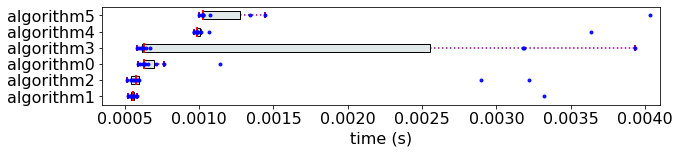

In [25]:
fig = rdl.visualize_box_plots(OP_STR,scale=0.3)

#### Ranks

In [26]:
rdl.data_ranks[OP_STR]

,case:concept:name,case:rank:q75-q25,case:flops,case:num_kernels,case:rel-flops
0,algorithm1,0,237000000.0,3,1.008475
1,algorithm2,0,237000000.0,3,1.008475
2,algorithm0,1,118000000.0,3,0.000000
3,algorithm3,1,294000000.0,3,1.491525
4,algorithm4,1,594000000.0,3,4.033898
5,algorithm5,2,632000000.0,3,4.355932


In [27]:
# from algorithm_ranking import RankVariantsDFGTr

# rv2 = RankVariantsDFGTr(rdl.dml.mls[THREADS][OP_STR].get_alg_measurements(),rdl.dml.mls[THREADS][OP_STR].h0 )
# rv2.rank_variants()
# rv2.graph.transitivity_reduction()
# rv2.graph.visualize()

### Step 5) Smart measurements

In [28]:
rm = RankingModel(name='R{}'.format(RANKING_METHOD),method=RANKING_METHOD)
rdl = RankingDataLinnea(dml,rm,THREADS)

In [29]:
sm = SmartMeasurementManager(rdl,adj_risk_thresh=0.00)

Ranking data from codes/MC4-ix01/ranking-data/rdl_24T_all_R3.pkl has been loaded.


In [30]:
sm.focus

['387_48_1072_676_127']

In [31]:
sm.filter_interesting_operands()

,op_str,num_algs,max-rel-flops,is_anomaly,n_rel0,n_anomalies,risk,time_inc,rel_inc,adj_risk,rel-flops-cutoff
88,387_48_1072_676_127,6,4.355932,True,1,1,1.0,0.000066,0.116412,0.116412,1.008475


In [32]:
sm.history

{'focus': [], 'dirty': False}

In [33]:
sm.generate_measure(REPS,RUN_ID,bSLRUM)

Focus: 387_48_1072_676_127
source ~/.analyzer; cd ~/PhD/va4algs-exps/MC4-ix01; python generate-variants-linnea.py 353 20 1106 675 170 --threads=24
['New solution:.............5.01e+07\n', 'No further generation steps possible.\n', '----------------------------------\n', 'Number of nodes:                 8\n', 'Solution nodes:                  1\n', 'Data:                     1.26e+06\n', 'Best solution:            5.01e+07\n', 'Intensity:                    39.7\n', 'Number of algorithms:            6\n', 'Generated Variants.\n']
Success: Backend interactive run: Generate variants
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/MC4-ix01/experiments/24T/353_20_1106_675_170/case_table.csv codes/MC4-ix01/cluster-data/24T/353_20_1106_675_170
b''
source ~/.analyzer; cd ~/PhD/va4algs-exps/MC4-ix01; python generate-variants-linnea.py 372 58 1047 636 115 --threads=24
['New solution:.............1.31e+08\n', 'No further generation steps possible.\n', '--------------------------

1

In [34]:
sm.check_slrum_status()

ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/353_20_1106_675_170/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/372_58_1047_636_115/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/364_33_1047_717_117/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/361_24_1046_636_148/run_times_competing_1*
ls ~/PhD/va4algs-exps/MC4-ix01/experiments/24T/391_23_1090_667_161/run_times_competing_1*
Completed


1

In [35]:
sm.rank_update()

10_131_1486_414_1272
101_439_711_682_511
1031_1350_238_223_1412
1033_42_1125_469_1497
1035_645_158_1398_39
1080_975_1340_279_374
1106_1435_50_1432_519
1137_1364_358_171_1308
1158_296_1012_564_49
1167_292_878_1269_892
1168_1183_209_201_45
117_504_867_658_27
1180_395_907_1180_1460
1267_190_1198_1243_977
1293_1124_5_1216_699
1297_111_1196_226_774
130_1003_714_1431_959
1319_1019_358_1400_901
142_963_873_693_614
1447_506_1425_926_1009
1466_1305_1375_3_1205
1476_386_64_301_1382
1477_1360_1221_423_400
1485_1128_1330_858_300
1489_794_103_185_46
1496_86_133_11_413
15_119_646_718_642
160_784_593_161_154
197_683_334_1394_905
20_1020_392_764_417
201_618_25_153_1256
208_246_1189_417_295
210_1093_662_1350_800
21_262_646_995_1243
223_6_838_616_824
223_804_1380_1475_1123
248_1095_1472_645_1223
266_186_812_997_925
275_192_1222_62_1109
281_325_41_870_964
29_699_203_653_820
318_1014_1443_503_386
322_97_963_974_606
361_415_695_170_31
36_363_1341_1102_118
371_1198_23_560_918
387_48_1072_676_127
405_407_142

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [36]:
rdl.data_anomalies

,op_str,num_algs,max-rel-flops,is_anomaly,n_rel0,n_anomalies,risk,time_inc,rel_inc,adj_risk,rel-flops-cutoff
0,223_6_838_616_824,6,79.000000,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
1,419_6_700_440_279,6,40.657077,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
2,210_1093_662_1350_800,6,2.850000,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
3,1466_1305_1375_3_1205,3,286.272727,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
4,729_1381_535_14_1096,6,36.791411,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
5,992_1155_229_832_382,6,2.463303,False,2,0,0.0,0.000000,0.000000,0.000000,0.000000
6,948_1338_71_772_423,6,8.576547,False,2,0,0.0,0.000000,0.000000,0.000000,0.000000
7,793_1179_416_105_31,6,9.961776,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
8,1137_1364_358_171_1308,6,3.125000,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000
9,50_329_747_567_113,6,5.571429,False,1,0,0.0,0.000000,0.000000,0.000000,0.000000


In [37]:
print("Percent Anomalies: {}".format(rdl.percent_anomalies))
print("Average Risk: {}".format(rdl.avg_risk))
print("Average Adjusted Risk: {}".format(rdl.avg_adj_risk))

Percent Anomalies: 0.01020408163265306
Average Risk: 0.01020408163265306
Average Adjusted Risk: 0.0011878735663130688


In [38]:
#sm.adj_risk_thresh = 0.0
sm.filter_interesting_operands()

,op_str,num_algs,max-rel-flops,is_anomaly,n_rel0,n_anomalies,risk,time_inc,rel_inc,adj_risk,rel-flops-cutoff
88,387_48_1072_676_127,6,4.355932,True,1,1,1.0,0.000066,0.116412,0.116412,1.008475


#### New focus

If focus is empty, make new measurements or reduce the adj_risk threshold

In [39]:
sm.focus

[]

#### Stop search path

If this is executed, then you force the focus to become empty

In [14]:
#sm.stop_search_path()

In [26]:
24*30/60.*40/60.

8.0